# Kmeans clusteing

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [2]:
#read dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [9]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Checking for missing data

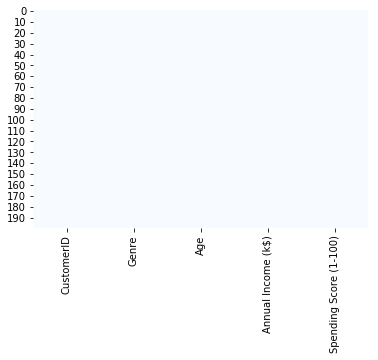

In [3]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='Blues')

# Creating the feature matrix

In [5]:
x = dataset.iloc[:,[3,4]].values

# choosing the optimal number of clusters with the Elbow method

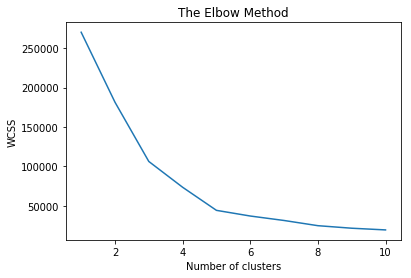

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

# Fitting the model with the optimal Clsuter number

In [7]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(x)

# Visulaizing the clusters

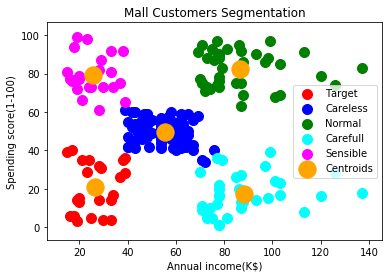

In [8]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Target')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Careless')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Normal')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Carefull')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='orange',label='Centroids')
plt.title('Mall Customers Segmentation')
plt.xlabel('Annual income(K$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()
